In [66]:
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [67]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Đọc giá trị capacity
        capacity = int(lines[2])
        # Đọc giá trị values và weights
        values = []
        weights = []
        for line in lines[4:]:
            value, weight = map(int, line.split())
            values.append(value)
            weights.append(weight)
        return values, weights, capacity

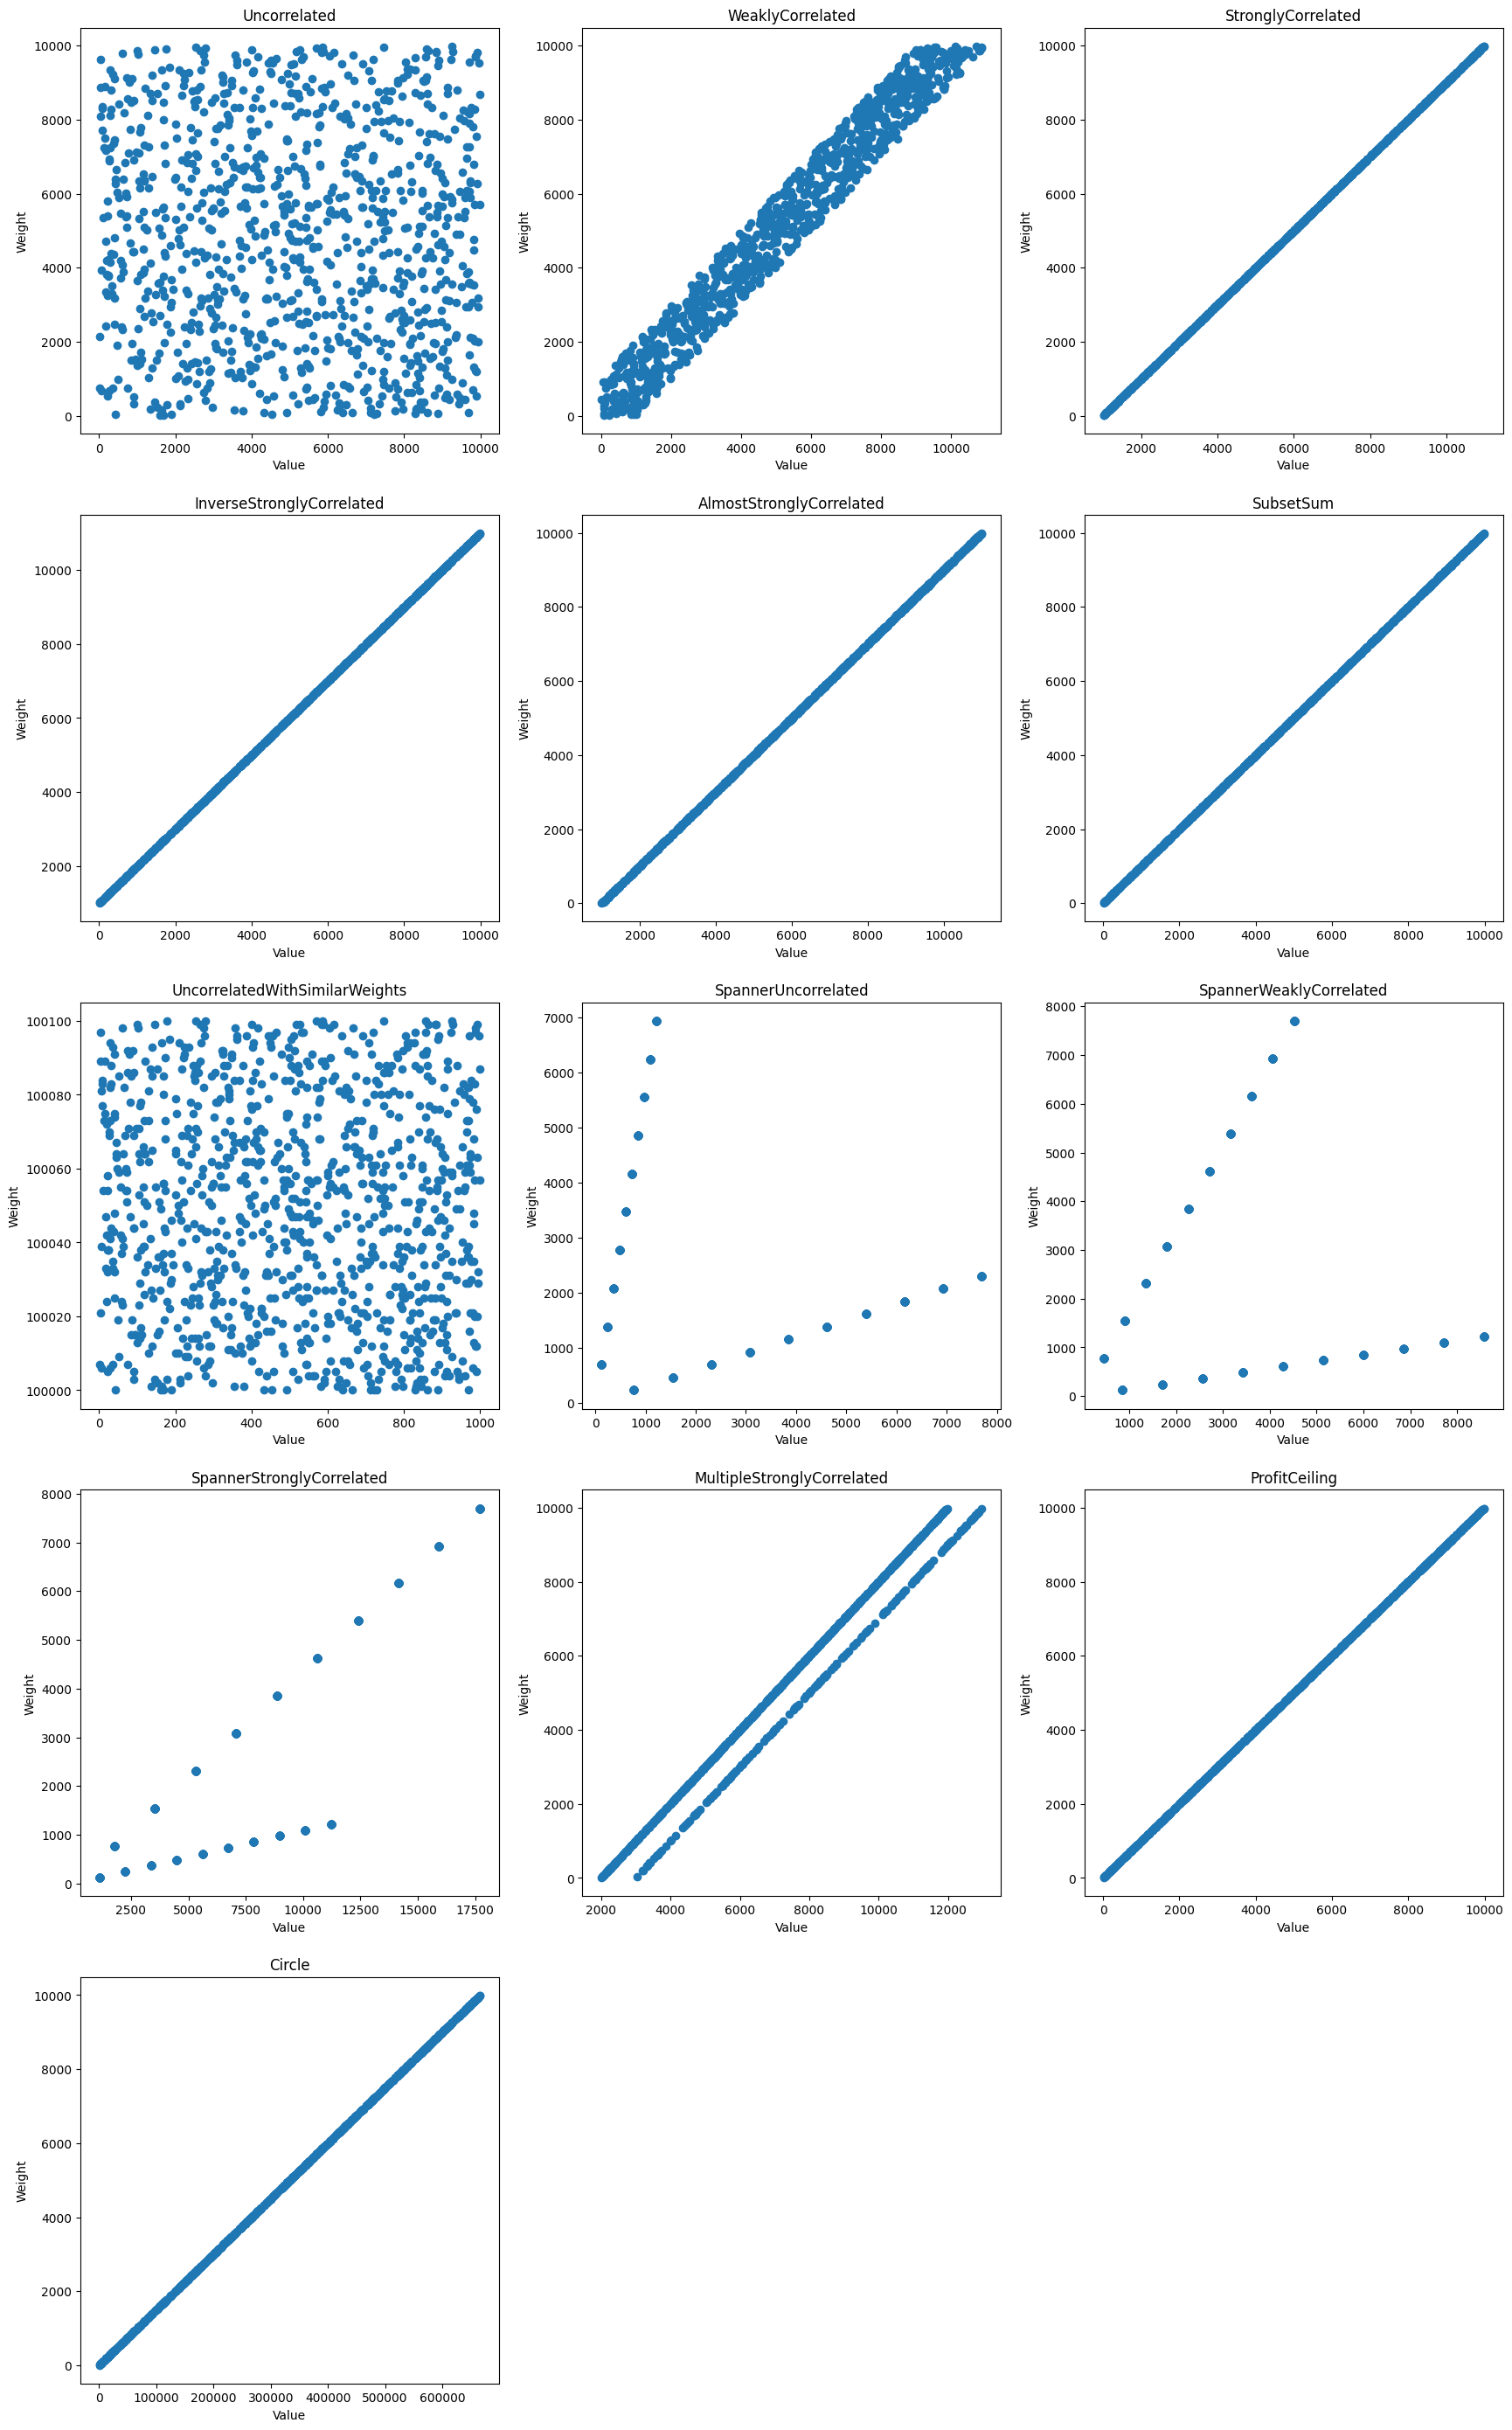

In [191]:
fig, axs = plt.subplots(5, 3, figsize=(21, 35))
files_path = glob.glob(r'kplib-master\*\n01000\R10000\s001.kp')
for i, ax in enumerate(axs.flatten()):
    if i >= len(files_path):
        ax.set_visible(False)
        continue
    values, weights, capacity = read_data(files_path[i])
    ax.scatter(values, weights)
    ax.set_title(files_path[i].split('\\')[1][2:])
    ax.set_xlabel('Value')
    ax.set_ylabel('Weight')

In [69]:
stt = '09'
df = pd.read_csv(f'SCIP result\{stt}.csv')
df

,class,n,R,s,totalValue,totalWeight,processingTime
0,09SpannerStronglyCorrelated,n00050,R01000,s000.kp,28440.0,11540.0,0.006981
1,09SpannerStronglyCorrelated,n00050,R01000,s001.kp,27261.0,6461.0,0.005494
2,09SpannerStronglyCorrelated,n00050,R01000,s002.kp,28713.0,13313.0,0.007485
3,09SpannerStronglyCorrelated,n00050,R01000,s003.kp,25627.0,5327.0,0.005606
4,09SpannerStronglyCorrelated,n00050,R01000,s004.kp,19821.0,2121.0,0.005636
...,...,...,...,...,...,...,...
995,09SpannerStronglyCorrelated,n01000,R10000,s095.kp,4829815.0,1608815.0,0.135576
996,09SpannerStronglyCorrelated,n01000,R10000,s096.kp,5090995.0,1585995.0,1.387887
997,09SpannerStronglyCorrelated,n01000,R10000,s097.kp,4983392.0,1274392.0,0.047766
998,09SpannerStronglyCorrelated,n01000,R10000,s098.kp,4859485.0,1454485.0,2.625893


In [70]:
df = pd.read_csv(f'SCIP result\\11.csv')
for n in ['n00050','n00100','n00200','n00500','n01000']:
    for r in ['R01000','R10000']:
        print(round(df[df.n==n][df.R==r].totalWeight.mean()))

12297
122871
24623
246023
49205
491618
123982
1238681
248060
2478296


C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_13712\1940329630.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(round(df[df.n==n][df.R==r].totalWeight.mean()))


In [158]:
na_values = pd.DataFrame([])
for c in ['00','01','02','03','04','05','06','07','08','09','10','11','12']:
    df = pd.read_csv(f'SCIP result\\{c}.csv')
    na_values = na_values.append(df[df['processingTime'].isna()])
na_values.iloc[:3]

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_13712\34130490.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_values = na_values.append(df[df['processingTime'].isna()])
C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_13712\34130490.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_values = na_values.append(df[df['processingTime'].isna()])
C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_13712\34130490.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_values = na_values.append(df[df['processingTime'].isna()])
C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_13712\34130490.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

,class,n,R,s,totalValue,totalWeight,processingTime
957,07SpannerUncorrelated,n01000,R10000,s057.kp,NaN,NaN,NaN
706,09SpannerStronglyCorrelated,n00500,R10000,s006.kp,NaN,NaN,NaN


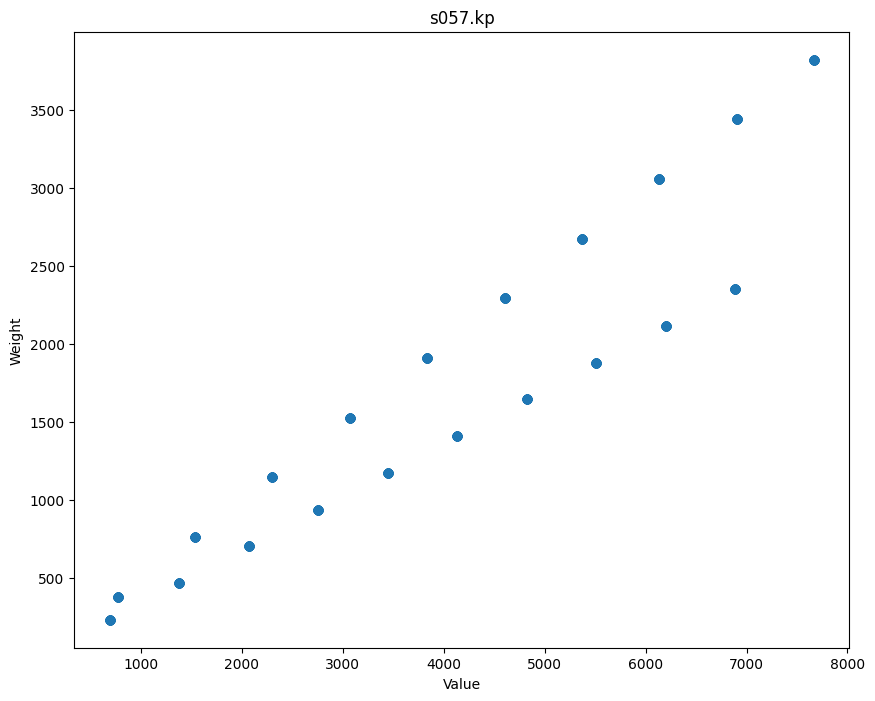

In [179]:
values, weights, capacity = read_data(r'kplib-master\07SpannerUncorrelated\n01000\R10000\s000.kp')
plt.figure(figsize=(10, 8))
plt.scatter(values, weights)
plt.title('s057.kp')
plt.xlabel('Value')
plt.ylabel('Weight')
plt.show()

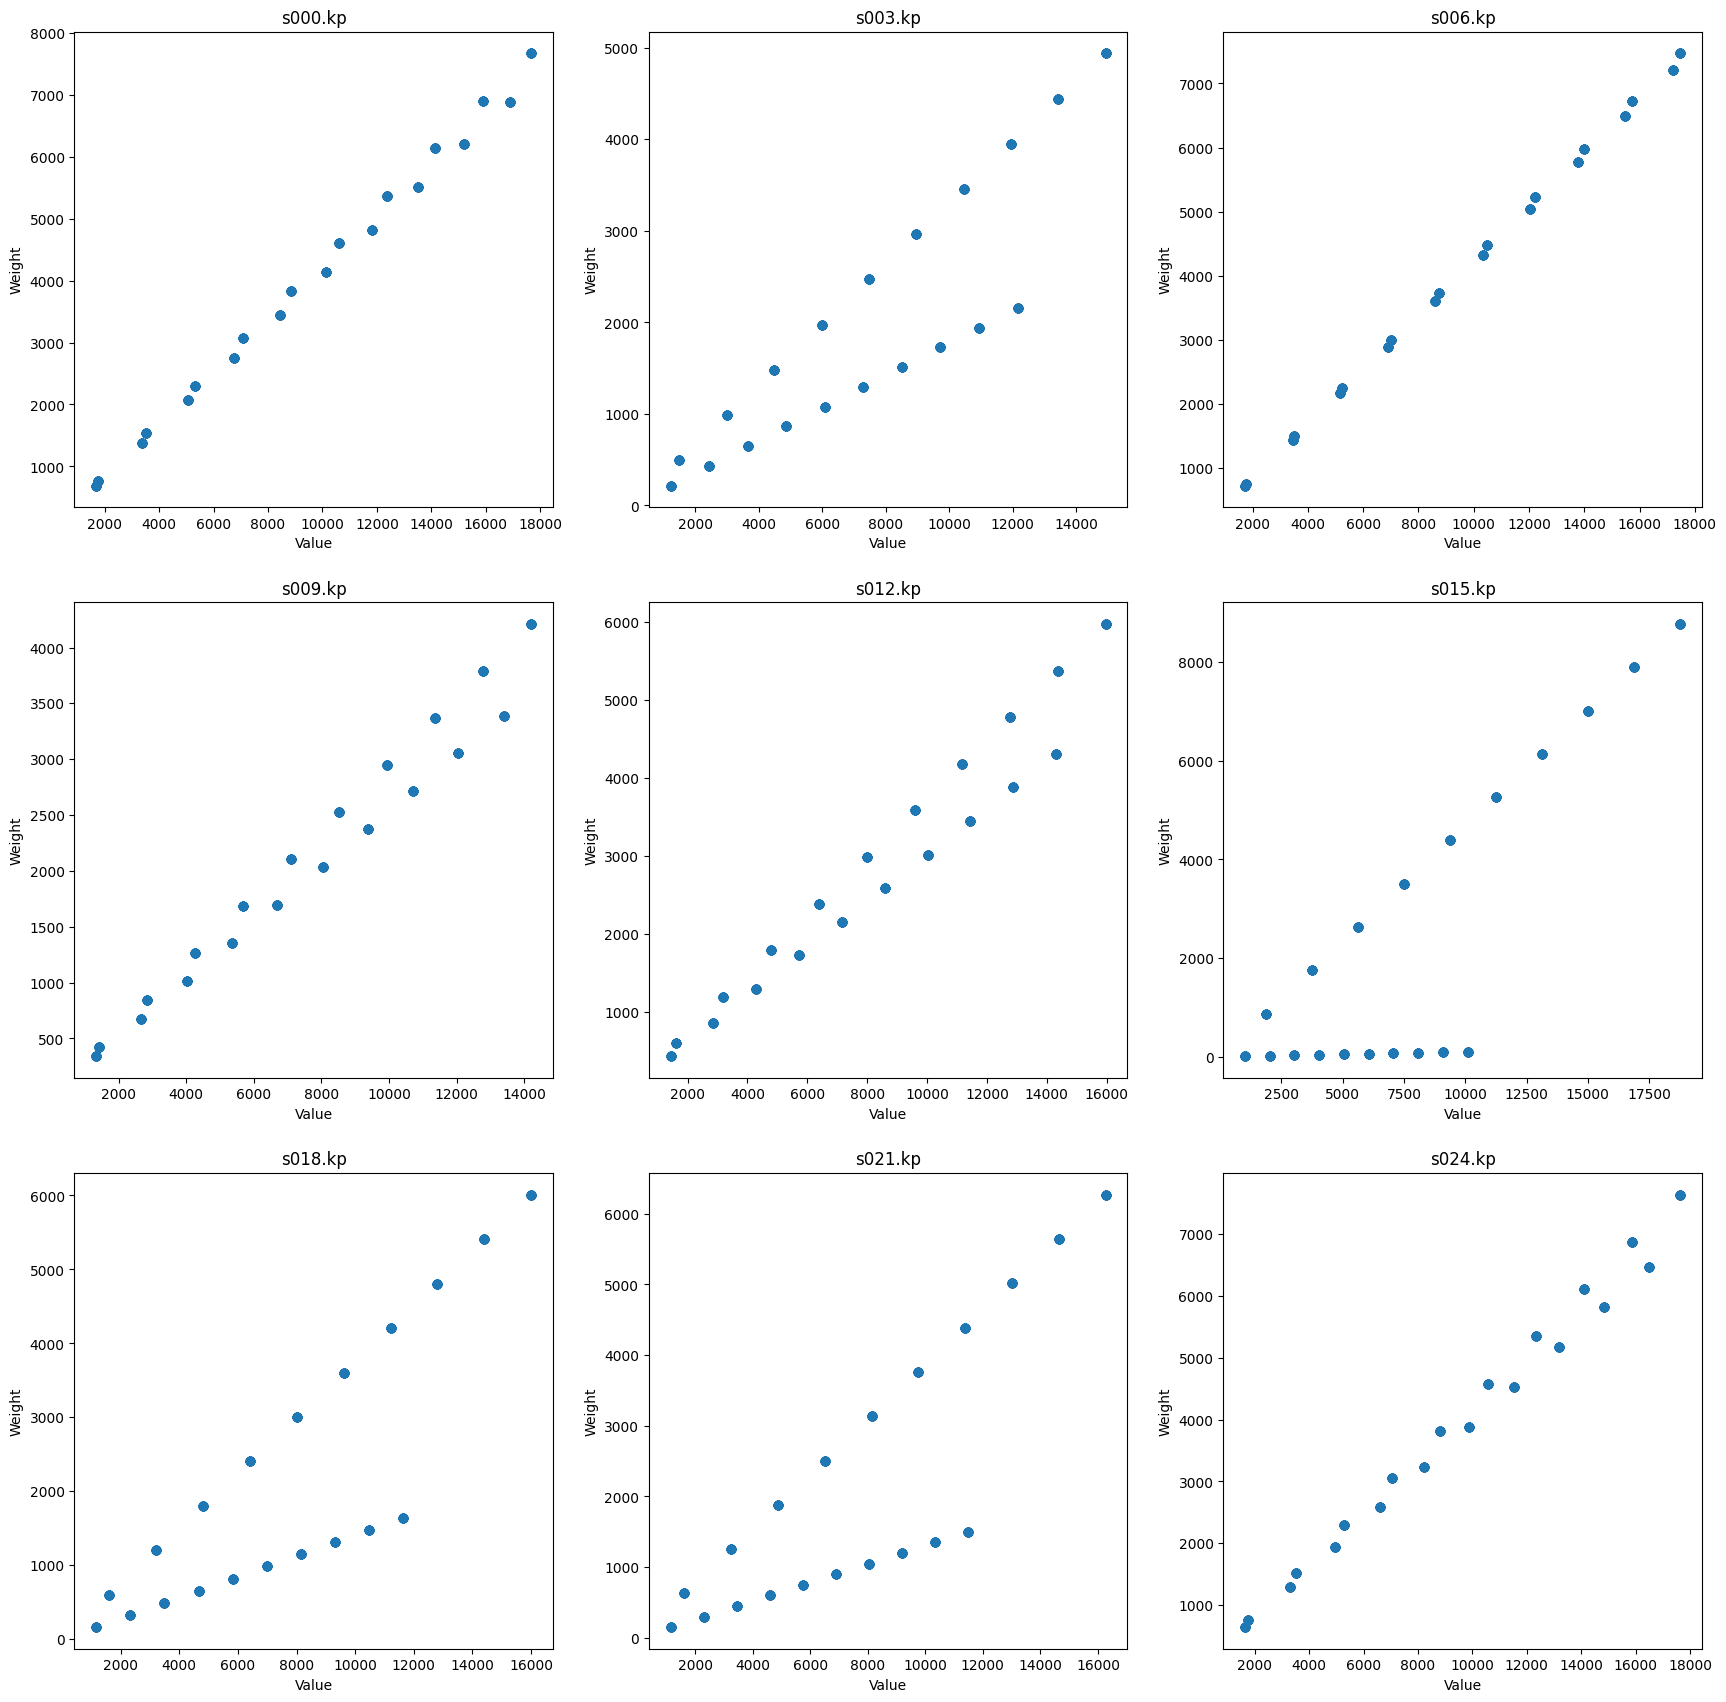

In [194]:
fig, axs = plt.subplots(3, 3, figsize=(21, 21))
files_path = glob.glob(r'kplib-master\09SpannerStronglyCorrelated\n00500\R10000\*.kp')
for i, ax in enumerate(axs.flatten()):
    values, weights, capacity = read_data(files_path[i*3])
    ax.scatter(values, weights)
    ax.set_title(files_path[i*3].split('\\')[-1])
    ax.set_xlabel('Value')
    ax.set_ylabel('Weight')

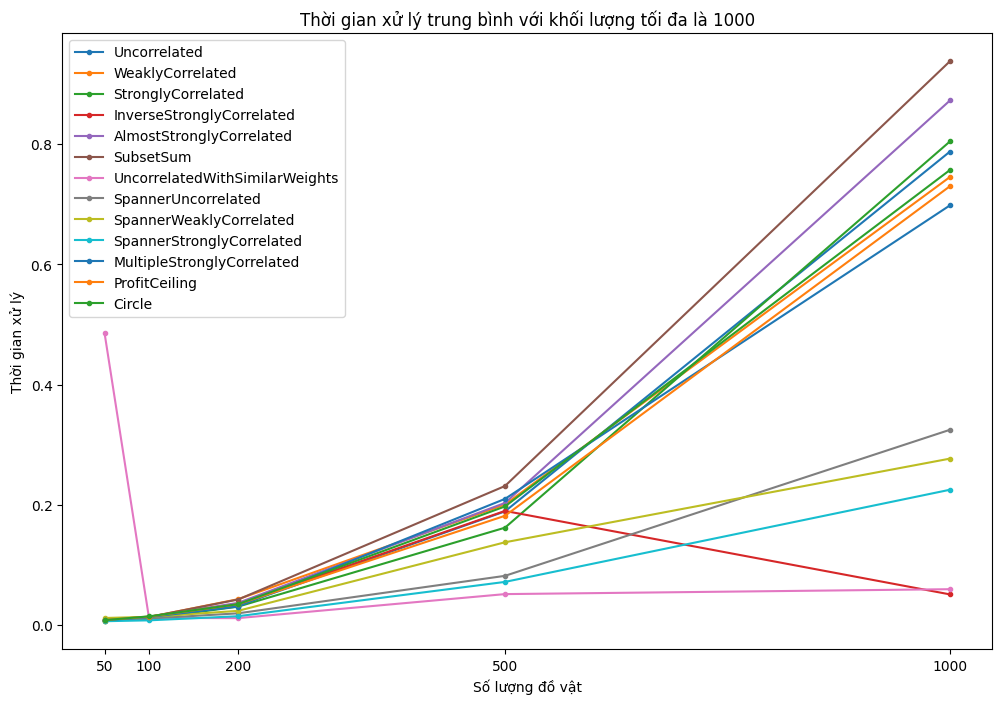

In [200]:
fig, ax = plt.subplots(figsize=(12, 8))
for c in ['00','01','02','03','04','05','06','07','08','09','10','11','12']:
    df = pd.read_csv(f'SCIP result\\{c}.csv')
    t_df = df[df.R == 'R01000'].groupby(df['n'])['processingTime'].mean()
    ax.plot([50,100,200,500,1000], t_df.values, marker='.', label=df['class'][0][2:])
    ax.legend(loc="upper left")
    ax.set_title('Thời gian xử lý trung bình với khối lượng tối đa là 1000')
    ax.set_xlabel('Số lượng đồ vật')
    ax.set_ylabel('Thời gian xử lý')
    ax.set_xticks([50,100,200,500,1000])
    
plt.show()

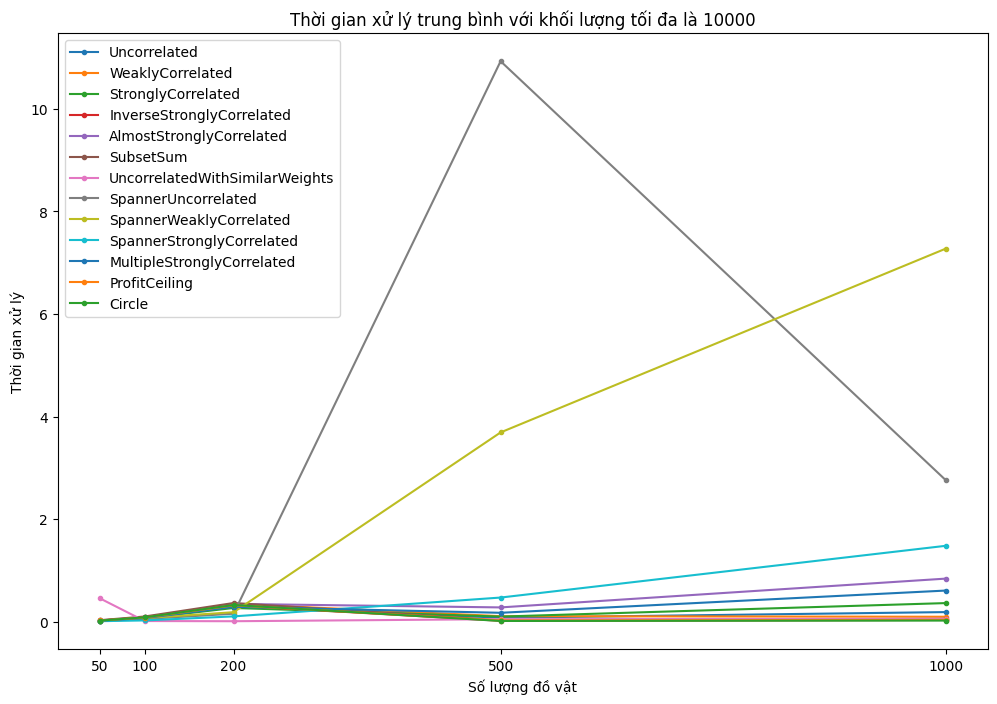

In [201]:
fig, ax = plt.subplots(figsize=(12, 8))
for c in ['00','01','02','03','04','05','06','07','08','09','10','11','12']:
    df = pd.read_csv(f'SCIP result\\{c}.csv')
    t_df = df[df.R == 'R10000'].groupby(df['n'])['processingTime'].mean()
    ax.plot([50,100,200,500,1000], t_df.values, marker='.', label=df['class'][0][2:])
    ax.legend(loc="upper left")
    ax.set_title('Thời gian xử lý trung bình với khối lượng tối đa là 10000')
    ax.set_xlabel('Số lượng đồ vật')
    ax.set_ylabel('Thời gian xử lý')
    ax.set_xticks([50,100,200,500,1000])
    
plt.show()

In [204]:
mean = []
for c in ['00','01','02','03','04','05','06','07','08','09','10','11','12']:
    df = pd.read_csv(f'SCIP result\\{c}.csv')
    mean.append([c,df.processingTime.mean()])
mean

[['00', 0.17246359109878537],
 ['01', 0.16788017487525936],
 ['02', 0.18467286419868467],
 ['03', 0.07815751194953914],
 ['04', 0.27281692123413087],
 ['05', 0.1828000380992889],
 ['06', 0.12158549165725706],
 ['07', 1.4356530586162486],
 ['08', 1.1707574813365935],
 ['09', 0.24267328394067894],
 ['10', 0.213541140794754],
 ['11', 0.1468514561653137],
 ['12', 0.14953299593925473]]

[]